In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from datetime import datetime
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options

# Read multiple URLs

In [ ]:
urls = ['https://www.pccomponentes.com/auriculares/mas-relevantes',
        'https://www.pccomponentes.com/auriculares?page=2',
        'https://www.pccomponentes.com/auriculares/alta-gama',
        'https://www.pccomponentes.com/auriculares/mejor-valorados',
        'https://www.pccomponentes.com/auriculares/mejor-valorados?page=2',
        'https://www.pccomponentes.com/auriculares/mas-vendidos',
        'https://www.pccomponentes.com/teclados/mas-relevantes',
        'https://www.pccomponentes.com/teclados?page=2',
        'https://www.pccomponentes.com/teclados/alta-gama',
        'https://www.pccomponentes.com/teclados/mejor-valorados',
        'https://www.pccomponentes.com/teclados/mejor-valorados?page=2',
        'https://www.pccomponentes.com/teclados/mas-vendidos',
        'https://www.pccomponentes.com/ratones/mas-relevantes',
        'https://www.pccomponentes.com/ratones?page=2',
        'https://www.pccomponentes.com/ratones/alta-gama',
        'https://www.pccomponentes.com/ratones/mejor-valorados',
        'https://www.pccomponentes.com/ratones/mejor-valorados?page=2',
        'https://www.pccomponentes.com/ratones/mas-vendidos',
        'https://www.pccomponentes.com/sillas-gaming/mas-relevantes',
        'https://www.pccomponentes.com/sillas-gaming?page=2',
        'https://www.pccomponentes.com/sillas-gaming/alta-gama',
        'https://www.pccomponentes.com/sillas-gaming/mejor-valorados',
        'https://www.pccomponentes.com/sillas-gaming/mejor-valorados?page=2',
        'https://www.pccomponentes.com/sillas-gaming/mas-vendidos',
        'https://www.pccomponentes.com/monitores-pc/mas-relevantes',
        'https://www.pccomponentes.com/monitores-pc?page=2',
        'https://www.pccomponentes.com/monitores-pc/alta-gama',
        'https://www.pccomponentes.com/monitores-pc/mejor-valorados',
        'https://www.pccomponentes.com/monitores-pc/mejor-valorados?page=2',
        'https://www.pccomponentes.com/monitores-pc/mas-vendidos',
        'https://www.pccomponentes.com/smartphone-moviles/mas-relevantes',
        'https://www.pccomponentes.com/smartphone-moviles?page=2',
        'https://www.pccomponentes.com/smartphone-moviles/alta-gama',
        'https://www.pccomponentes.com/smartphone-moviles/mejor-valorados',
        'https://www.pccomponentes.com/smartphone-moviles/mejor-valorados?page=2',
        'https://www.pccomponentes.com/smartphone-moviles/mas-vendidos',
        ]
for url in urls:
        category = url.split('.com/')[-1]
        chrome = webdriver.Chrome()
        chrome.get(url)
        print("READING", url)
        try:
                element = WebDriverWait(chrome, 10).until(
                        EC.presence_of_element_located((By.ID, "cookiesAcceptAll"))
                )
                chrome.find_element(By.ID, 'cookiesAcceptAll').click()
        except:
                print("No hay cookies", url)
                pass
        
        grid = chrome.find_element(By.ID, 'product-grid')
        products = grid.find_elements(By.TAG_NAME, 'div')
        links = grid.find_elements(By.TAG_NAME, 'a')
        products_founded = 0
        print(f"LINKS FOUNDED: {len(links)}")
        for link in links:
                try:
                        if link.get_attribute('data-product-id'):
                                product = link.find_element(By.CLASS_NAME, 'product-card')
                                name = ''
                                price = ''
                                reviews = ''
                                marketplace = False
                                if 'is-marketplace' in product.get_attribute('class'):
                                        marketplace = True
                                try:
                                        name = product.find_element(By.TAG_NAME, 'h3').text
                                except:
                                        pass
                                try:
                                        price = product.find_element(By.CLASS_NAME, 'product-card__price-container').text.split('€')[0].replace(',','.')
                                except:
                                        pass
                                try:
                                        rating = product.find_element(By.CLASS_NAME, 'product-card__rating-container')
                                        reviews = rating.find_element(By.TAG_NAME, 'span').text.replace('(','').replace(')','')
                                except:
                                        pass
                                
                                if name!='' and price!='' and reviews!='':
                                        products_founded += 1
                                        with open('products.csv', 'a', newline='') as file:
                                                file.write(f'{url};{category};{name};{price};{reviews};{marketplace}\n')
                except Exception as e:
                        print("Error", e)
                        pass

        print(f"PRODUCTS FOUNDED: {products_founded}")
        chrome.quit()
        time.sleep(5)



# Analyze

### Questions?
- What is the relationship between reviews and price?
- Which are the best products to improve?

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

__Clean dataset__

In [48]:
column_names = ['url', 'category', 'name', 'price', 'reviews', 'marketplace'] 
df = pd.read_csv('products.csv', sep=';',encoding='ISO-8859-1', names=column_names)

#Clean null values
df = df.dropna(subset=['reviews'])

#Extract category
def extract_category(url):
    return url.split('.com/')[-1].split('?')[0].split('/')[0]

df['category'] = df['url'].apply(extract_category)

#Extract order
def extract_order(url):
    if '?' in url:
        return 'mas-relevantes-2'
    return url.split('.com/')[-1].split('/')[-1]

df['order'] = df['url'].apply(extract_order)

__Dataframe information__

UNIQUE PRODUCTS: 927 / 1243
PRODUCTS REPEATED: 551 / 1243
SPONSORED PRODUCTS: 427 / 1243
             category  counts
0         auriculares     148
1        monitores-pc     169
2             ratones     153
3       sillas-gaming     130
4  smartphone-moviles     179
5            teclados     148


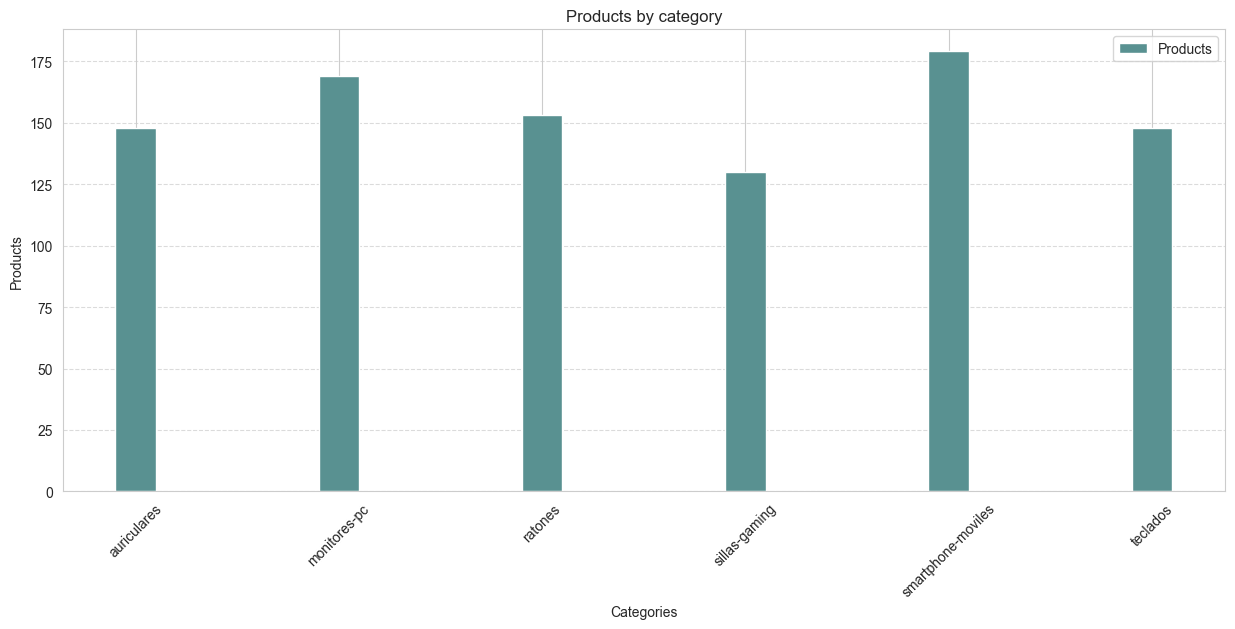

In [113]:
uniqueProducts = df.drop_duplicates(subset=['name'])
print(f"UNIQUE PRODUCTS: {len(uniqueProducts)} / {len(df)}")

productRepeated = df[df.duplicated(subset=['name'], keep=False)]
print(f"PRODUCTS REPEATED: {len(productRepeated)} / {len(df)}")

marketplace = df[df['marketplace']==True]
print(f"SPONSORED PRODUCTS: {len(marketplace)} / {len(df)}")

productsByCategory = uniqueProducts.groupby(['category']).size().reset_index(name='counts')
print(productsByCategory)

categories = productsByCategory['category'].tolist()
num_stats = len(categories)
bar_width = 0.2
x = np.arange(num_stats)

plt.figure(figsize=(15, 6))

plt.bar(x, productsByCategory['counts'], bar_width, label='Products', color='#599191')

plt.title('Products by category')
plt.xlabel('Categories')
plt.ylabel('Products')
plt.xticks(x, categories, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

__Information by categories__

In [50]:
prices = {}
reviews = {}
df['price'] = pd.to_numeric(df['price'], errors='coerce')
for category in df['category'].unique():
    category_prices = df[df['category'] == category]['price']
    prices[category] = {
        'mean': category_prices.mean(),
        'max': category_prices.max(),
        'min': category_prices.min(),
        '25': category_prices.quantile(0.25),
        '50': category_prices.quantile(0.5),
        '75': category_prices.quantile(0.75),
        'std': category_prices.std(),
        'total': len(category_prices),
        'unique': len(uniqueProducts[uniqueProducts['category'] == category]),
        'marketplace': len(marketplace[marketplace['category'] == category])
    }
    category_reviews = df[df['category'] == category]['reviews']
    reviews[category] = {
        'mean': category_reviews.mean(),
        'max': category_reviews.max(),
        'min': category_reviews.min(),
        '25': category_reviews.quantile(0.25),
        '50': category_reviews.quantile(0.5),
        '75': category_reviews.quantile(0.75),
        'std': category_reviews.std(),
        'total': len(category_reviews),
        'unique': len(uniqueProducts[uniqueProducts['category'] == category]),
        'marketplace': len(marketplace[marketplace['category'] == category])
    }
prices_df = pd.DataFrame.from_dict(prices, orient='index')
reviews_df = pd.DataFrame.from_dict(reviews, orient='index')
display(prices_df, reviews_df)

,mean,max,min,25,50,75,std,total,unique,marketplace
auriculares,124.362158,599.00,1.339,30.0000,79.980,174.8900,122.548080,171,148,55
teclados,101.236333,393.52,6.130,35.7400,82.990,142.6575,82.398632,210,148,57
ratones,79.946278,596.65,3.190,24.9900,59.830,118.9000,76.448003,223,153,73
sillas-gaming,275.399991,964.04,1.499,169.7175,233.990,321.6275,155.938404,217,130,101
monitores-pc,207.428450,789.00,1.499,128.1300,179.000,247.7450,124.547662,224,169,69
smartphone-moviles,239.077801,969.00,1.019,76.7425,169.555,350.0600,236.829038,198,179,72


,mean,max,min,25,50,75,std,total,unique,marketplace
auriculares,461.912281,4881,1,15.5,166.0,377.50,879.313990,171,148,55
teclados,537.495238,5490,1,38.5,171.0,432.25,922.243428,210,148,57
ratones,636.923767,9530,1,30.0,193.0,582.00,1422.127359,223,153,73
sillas-gaming,214.239631,5777,1,20.0,68.0,149.00,600.267415,217,130,101
monitores-pc,348.575893,2290,1,64.0,217.0,426.00,457.342934,224,169,69
smartphone-moviles,408.459596,1727,1,161.0,223.0,447.00,469.721416,198,179,72


__Price - Reviews - Category - Order__

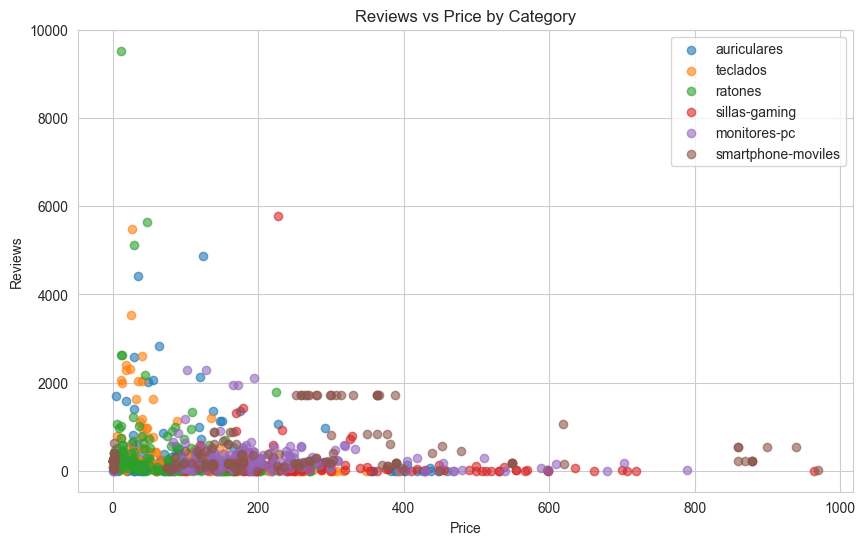

In [70]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Iterate over unique categories
for category in uniqueProducts['category'].unique():
    category_data = uniqueProducts[uniqueProducts['category'] == category]
    plt.scatter(category_data['price'], category_data['reviews'], label=category, alpha=0.6)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.title('Reviews vs Price by Category')
plt.legend()
plt.show()

__Reviews__

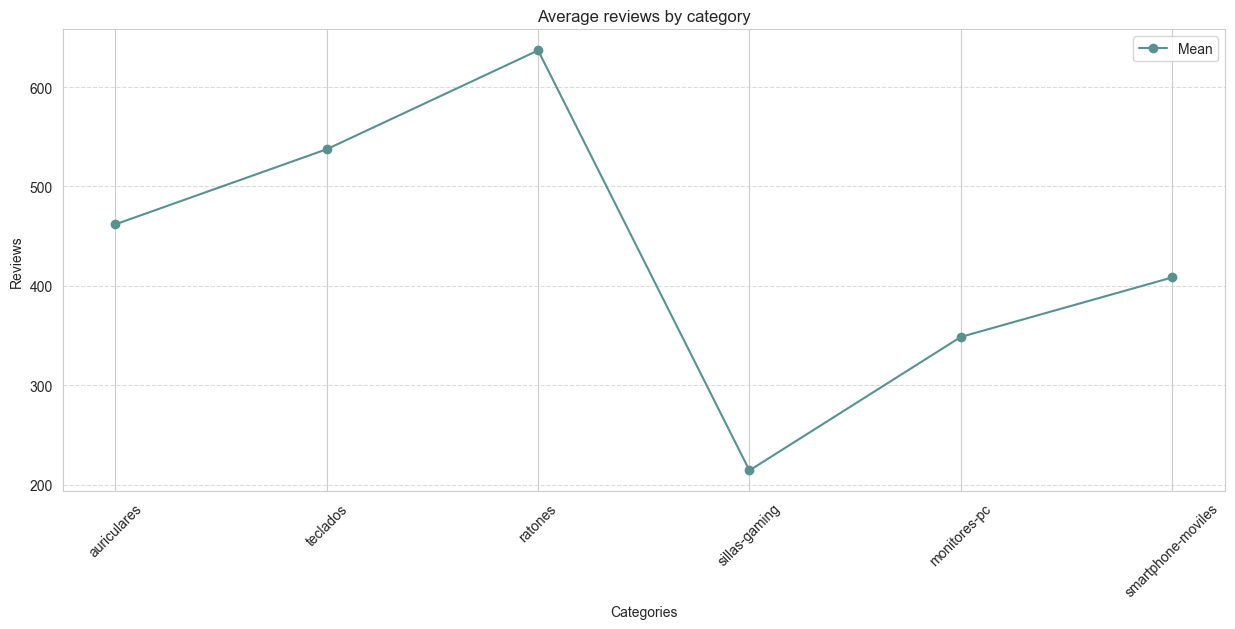

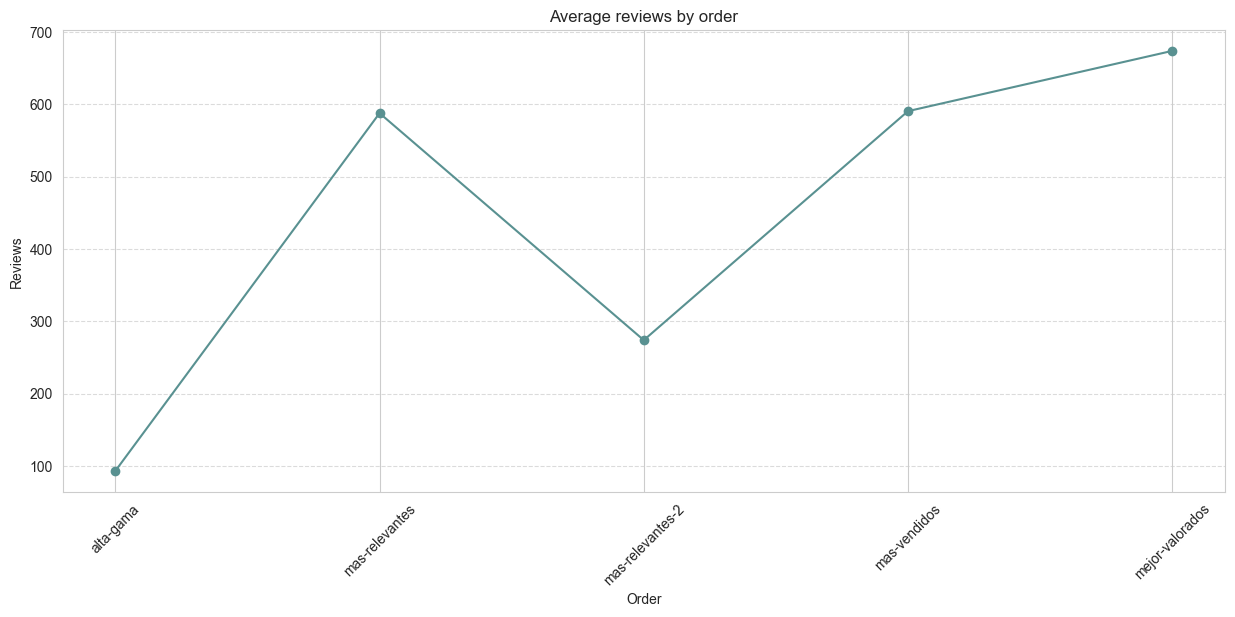

In [82]:

plt.figure(figsize=(15, 6))
plt.plot(reviews_df['mean'], label='Mean', marker='o', color='#599191')
plt.title('Average reviews by category')
plt.xlabel('Categories')
plt.ylabel('Reviews')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

average_reviews_by_category = df.groupby('order')['reviews'].mean().reset_index()
average_reviews_by_category.rename(columns={'reviews': 'average_reviews'}, inplace=True)
plt.figure(figsize=(15, 6))
plt.plot(average_reviews_by_category['order'], average_reviews_by_category['average_reviews'], color='#599191', marker='o')
plt.title('Average reviews by order')
plt.xlabel('Order')
plt.ylabel('Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Plans

__Hypothetical__
- 5% of visits, converts in customers
- 10% of customers give a review
- For each 100 generated reviews we can increase 5% visits


In [229]:
visits_from_customers_factor = 20
customers_from_visits_factor = 0.05

customers_from_reviews_factor = 10

new_reviews_factor = 0.05



## Improve high ticket products

__Information about high ticket products__

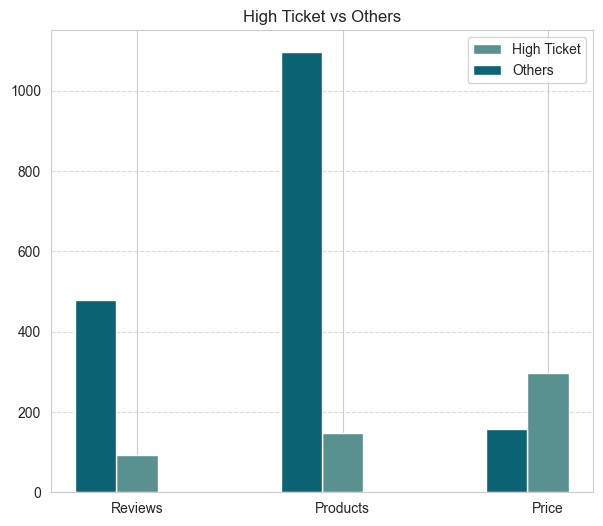

In [258]:
funnel = df.copy()
funnel['customers'] = funnel['reviews'] * customers_from_reviews_factor
funnel['visits'] = funnel['customers'] * visits_from_customers_factor
funnel['revenue'] = funnel['price'] * funnel['customers']

highTicketProducts = funnel[funnel['order'] == 'alta-gama']

restProducts = funnel[funnel['order'] != 'alta-gama']
categories = ['Reviews', 'Products', 'Price']
num_stats = len(categories)
bar_width = 0.2

highTicketStats = [
    highTicketProducts['reviews'].mean(),
    len(highTicketProducts),
    highTicketProducts['price'].mean(),
]
otherStats = [
    restProducts['reviews'].mean(),
    len(restProducts),
    restProducts['price'].mean(),
]
x = np.arange(num_stats)

plt.figure(figsize=(7, 6))

plt.bar(x, highTicketStats, bar_width, label='High Ticket', color='#599191')
plt.bar(x-bar_width, otherStats, bar_width, label='Others', color='#0b6374')

plt.title('High Ticket vs Others')
plt.xticks(x, categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

__Funnel__

In [260]:
print("FUNNEL")
print("High Ticket -> Others")
print(f"Visits: {highTicketProducts['visits'].mean()} -> {restProducts['visits'].mean()}")
print(f"Customers: {highTicketProducts['customers'].mean()} -> {restProducts['customers'].mean()}")
print(f"Reviews: {highTicketProducts['reviews'].mean()} -> {restProducts['reviews'].mean()}")
print(f"Revenue: {highTicketProducts['revenue'].mean()} -> {restProducts['revenue'].mean()}")

FUNNEL
High Ticket -> Others
Visits: 18613.60544217687 -> 95923.35766423358
Customers: 930.6802721088435 -> 4796.167883211679
Reviews: 93.06802721088435 -> 479.61678832116786
Revenue: 130335.57423076921 -> 568523.2183118081


__Find opportunities__

Opportunities: 139 / 147
Generate: 59910.73357664233 new reviews
Average reviews: 407.556010725458


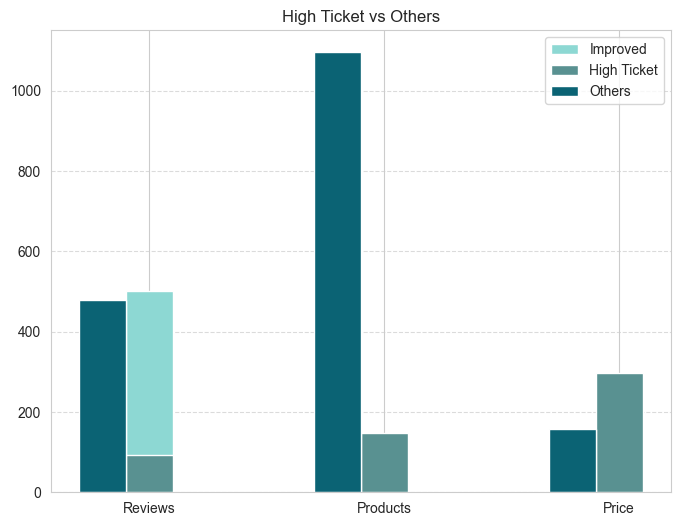

In [261]:
opportunities = highTicketProducts[highTicketProducts['reviews'] < restProducts['reviews'].mean()]

improved = highTicketProducts.copy()
def getNeededReviews(reviews):
    needed = restProducts['reviews'].mean() - reviews
    if needed < 0:
        return 0
    return needed

improved['needed_reviews'] = improved['reviews'].apply(getNeededReviews)


print(f"Opportunities: {len(opportunities)} / {len(highTicketProducts)}")
print(f"Generate: {improved['needed_reviews'].sum()} new reviews")
print(f"Average reviews: {improved['needed_reviews'].mean()}")
categories = ['Reviews', 'Products', 'Price']
num_stats = len(categories)
bar_width = 0.2

improvedStats = [
    improved['reviews'].mean() + improved['needed_reviews'].mean(),
    0,
    0
]

x = np.arange(num_stats)

plt.figure(figsize=(8, 6))

plt.bar(x, improvedStats, bar_width, label='Improved', color='#8dd8d3')
plt.bar(x, highTicketStats, bar_width, label='High Ticket', color='#599191')
plt.bar(x-bar_width, otherStats, bar_width, label='Others', color='#0b6374')

plt.title('High Ticket vs Others')
plt.xticks(x, categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Improvement predictions

__Case 1: Buy all reviews__

In [239]:
case1 = improved.copy()
case1['visits'] = case1['visits'] + ((case1['visits']+new_reviews_factor)*(case1['needed_reviews'].mean()/100))
case1['customers']= case1['visits'] * customers_from_visits_factor
case1['revenue'] = case1['price'] * case1['customers']
beforeRevenue = round(highTicketProducts['revenue'].mean(), 0)
beforeRevenue = '{:,.0f}'.format(beforeRevenue).replace(',', '.')  
afterRevenue = round(case1['revenue'].mean(), 0)
afterRevenue = '{:,.0f}'.format(afterRevenue).replace(',', '.')  

reviewsGenerated = round(case1['needed_reviews'].sum(),0)
reviewsGenerated = '{:,.0f}'.format(reviewsGenerated).replace(',', '.')  

increase = case1['revenue'].mean() - highTicketProducts['revenue'].mean()
increase_percentage = (case1['revenue'].mean() / highTicketProducts['revenue'].mean()) * 100
increase_percentage = round(increase_percentage, 0)
increase_percentage = '{:,.0f}'.format(increase_percentage).replace(',', '.')  

increase = round(increase, 0)
increase = '{:,.0f}'.format(increase).replace(',', '.')  

print(f"Before revenue: {beforeRevenue}€")
print(f"After revenue: {afterRevenue}€")
print(f"Reviews_genearted: {reviewsGenerated} reviews")
print()
print(f"INCREASE: {increase}€ ({increase_percentage}%)")

#print()
#print("FUNNEL")
#print("VISITS  ->  CUSTOMERS  ->  REVENUE")
#print(f"{improved['visits'].mean()} -> {improved['customers'].mean()} -> {improved['revenue'].mean()}€")
#print(f"{case1['visits'].mean()} -> {case1['customers'].mean()} -> {case1['revenue'].mean()}€")

Before revenue: 130.336€
After revenue: 661.529€
Reviews_genearted: 59.911 reviews

INCREASE: 531.193€ (508%)


__Case 2: Buy max 30 reviews per product__

In [237]:
def getNeededReviews(needed):
    if needed > 30:
        return 30
    return needed

case2 = improved.copy()
case2['needed_reviews'] = case2['needed_reviews'].apply(getNeededReviews)
case2['visits'] = case2['visits'] + ((case2['visits']+new_reviews_factor)*(case2['needed_reviews'].mean()/100))
case2['customers']= case2['visits'] * customers_from_visits_factor
case2['revenue'] = case2['price'] * case2['customers']

beforeRevenue = round(highTicketProducts['revenue'].mean(), 0)
beforeRevenue = '{:,.0f}'.format(beforeRevenue).replace(',', '.')  
afterRevenue = round(case2['revenue'].mean(), 0)
afterRevenue = '{:,.0f}'.format(afterRevenue).replace(',', '.')  

reviewsGenerated = round(case2['needed_reviews'].sum(),0)
reviewsGenerated = '{:,.0f}'.format(reviewsGenerated).replace(',', '.')  

increase = case2['revenue'].mean() - highTicketProducts['revenue'].mean()
increase_percentage = (case2['revenue'].mean() / highTicketProducts['revenue'].mean()) * 100
increase_percentage = round(increase_percentage, 0)
increase_percentage = '{:,.0f}'.format(increase_percentage).replace(',', '.')  

increase = round(increase, 0)
increase = '{:,.0f}'.format(increase).replace(',', '.')  

print(f"Before revenue: {beforeRevenue}€")
print(f"After revenue: {afterRevenue}€")
print(f"Reviews_genearted: {reviewsGenerated} reviews")
print()
print(f"INCREASE: {increase}€ ({increase_percentage}%)")

Before revenue: 130.336€
After revenue: 167.309€
Reviews_genearted: 4.170 reviews

INCREASE: 36.973€ (128%)


__Case 3: Buy max 30 reviews only for products with less than 20 reviews__

In [238]:
def getNeededReviews(row):
    if row['reviews'] > 20:
        return 0
    elif row['needed_reviews'] > 30:
        return 30
    else:
        return row['needed_reviews']

case3 = improved.copy()
case3['needed_reviews'] = case3.apply(getNeededReviews, axis=1)
case3['visits'] = case3['visits'] + ((case3['visits']+new_reviews_factor)*(case3['needed_reviews'].mean()/100))
case3['customers']= case3['visits'] * customers_from_visits_factor
case3['revenue'] = case3['price'] * case3['customers']


beforeRevenue = round(highTicketProducts['revenue'].mean(), 0)
beforeRevenue = '{:,.0f}'.format(beforeRevenue).replace(',', '.')  
afterRevenue = round(case3['revenue'].mean(), 0)
afterRevenue = '{:,.0f}'.format(afterRevenue).replace(',', '.')  

reviewsGenerated = round(case3['needed_reviews'].sum(),0)
reviewsGenerated = '{:,.0f}'.format(reviewsGenerated).replace(',', '.')  

increase = case3['revenue'].mean() - highTicketProducts['revenue'].mean()
increase_percentage = (case3['revenue'].mean() / highTicketProducts['revenue'].mean()) * 100
increase_percentage = round(increase_percentage, 0)
increase_percentage = '{:,.0f}'.format(increase_percentage).replace(',', '.')  

increase = round(increase, 0)
increase = '{:,.0f}'.format(increase).replace(',', '.')  

print(f"Before revenue: {beforeRevenue}€")
print(f"After revenue: {afterRevenue}€")
print(f"Reviews_genearted: {reviewsGenerated} reviews")
print()
print(f"INCREASE: {increase}€ ({increase_percentage}%)")

Before revenue: 130.336€
After revenue: 156.137€
Reviews_genearted: 2.910 reviews

INCREASE: 25.801€ (120%)


### Charts

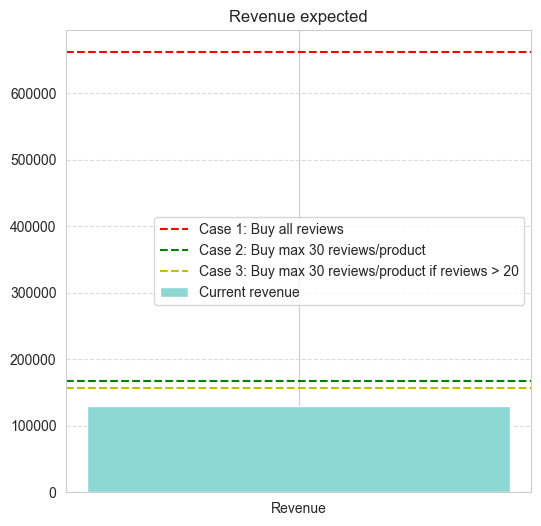

In [262]:

bar_width = 0.2
categories = ['Revenue']
x = np.arange(len(categories))
plt.figure(figsize=(6, 6))

plt.bar(x, highTicketProducts['revenue'].mean(), bar_width, label='Current revenue', color='#8dd8d3')
plt.axhline(y=case1['revenue'].mean(), color='r', linestyle='--', label='Case 1: Buy all reviews') 
plt.axhline(y=case2['revenue'].mean(), color='g', linestyle='--', label='Case 2: Buy max 30 reviews/product') 
plt.axhline(y=case3['revenue'].mean(), color='y', linestyle='--', label='Case 3: Buy max 30 reviews/product if reviews > 20') 

plt.title('Revenue expected')
plt.xticks(x, categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()